In [1]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [6]:
import requests 
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# IF the image folder doesn't exist download it and prepare it
if image_path.is_dir():
    print(f"{image_path} dir already exist... skipping download")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    # request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizaa, steak, sushi data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizaa, steak and sushi data...")
    zip_ref.extractall(image_path)

data\pizza_steak_sushi dir already exist... skipping download
Unzipping pizaa, steak and sushi data...


In [15]:
# Becoming one with the data ( data preparation and data exploration)

import os
def walk_through_dir(dir_path):
    """Walks through dir_path its contents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}''")
print(image_path)
walk_through_dir(image_path)

data\pizza_steak_sushi
There are 2 directories and 0 images in 'data\pizza_steak_sushi''
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test''
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza''
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak''
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi''
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train''
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza''
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak''
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi''


In [16]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing and image

1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the image with Python's PIL
5. Show the image and print metadata

Random image_path: data\pizza_steak_sushi\train\pizza\1105700.jpg
Image class: pizza
Image hieght: 512
Image width: 512


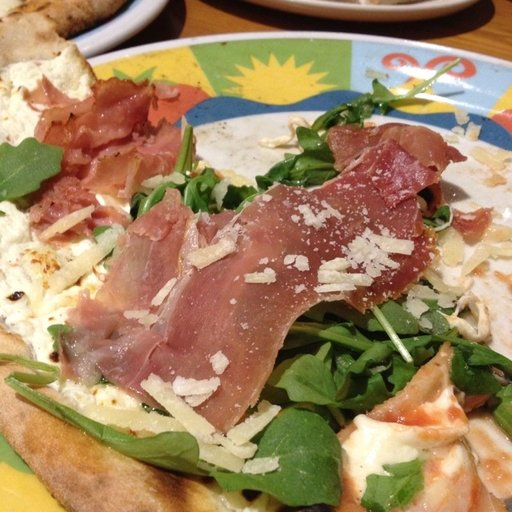

In [59]:
import random
from PIL import Image

# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the iamge class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image_path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image hieght: {img.height}")
print(f"Image width: {img.width}")
img

<class 'numpy.ndarray'>


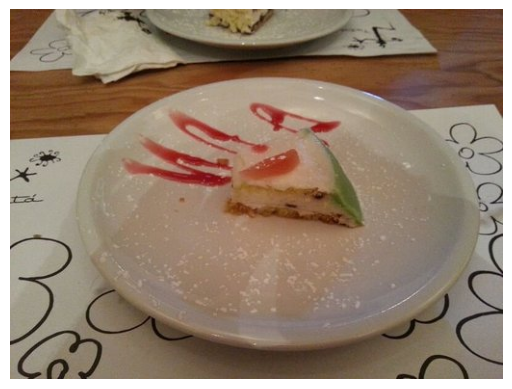

In [60]:
## Visualizing image using matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# loading image
rand_image = mpimg.imread(random.choice(image_path_list))
print(type(rand_image))

plt.imshow(rand_image)
plt.axis(False)
plt.show()

(-0.5, 511.5, 511.5, -0.5)

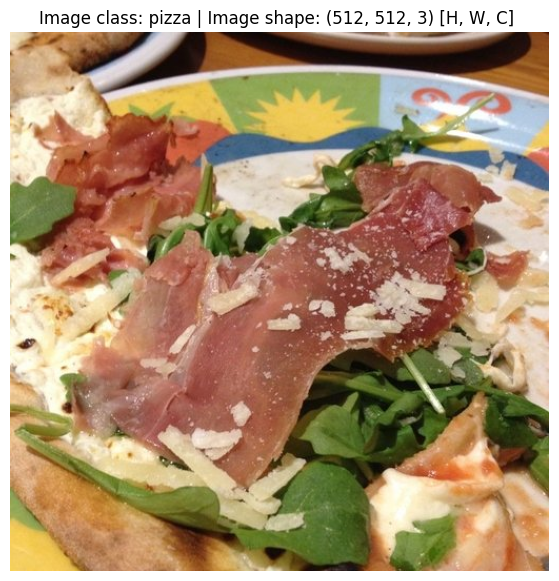

In [61]:
import numpy as np

# Turn the image into an array
img_as_array = np.asarray(img)

# plot the image with matplolib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} [H, W, C] ")
plt.axis(False)

# 3. Transforming data (into tensors)

1. Turn the target data into tensors
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoder`.

In [66]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 3.1 Transforming data with torchvision.transforms

In [69]:
# Write a transform for iamge
data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [70]:
data_transform(img).shape

torch.Size([3, 64, 64])